In [72]:
# Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Download NLTK resources
nltk.download('stopwords')

# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('Tweets.csv')

[nltk_data] Downloading package stopwords to C:\Users\Aadil
[nltk_data]     Rayeen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# Display the head, tail, describe, and shape of the dataset
print("Head:")
print(df.head())

Head:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN  

In [75]:
print("\nTail:")
print(df.tail())


Tail:
                 tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenRee

In [76]:
print("\nDescribe:")
print(df.describe())


Describe:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [77]:
print("\nShape:")
print(df.shape)


Shape:
(14640, 15)


In [78]:
# Data cleaning and preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [79]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['airline_sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [80]:
# Linear Classifier (Logistic Regression)
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [81]:
#Make predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

In [82]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", accuracy_lr)

# Display confusion matrix and classification report for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

class_report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report (Logistic Regression):")
print(class_report_lr)



Logistic Regression Accuracy: 0.7974726775956285

Confusion Matrix (Logistic Regression):
[[1761   91   37]
 [ 258  283   39]
 [ 118   50  291]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1889
     neutral       0.67      0.49      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



In [83]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Make predictions
y_pred_rf = rf_classifier.predict(X_test_tfidf)

In [85]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)

# Display confusion matrix and classification report for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)

class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report (Random Forest):")
print(class_report_rf)


Random Forest Accuracy: 0.7711748633879781

Confusion Matrix (Random Forest):
[[1761   97   31]
 [ 300  239   41]
 [ 146   55  258]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.61      0.41      0.49       580
    positive       0.78      0.56      0.65       459

    accuracy                           0.77      2928
   macro avg       0.73      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



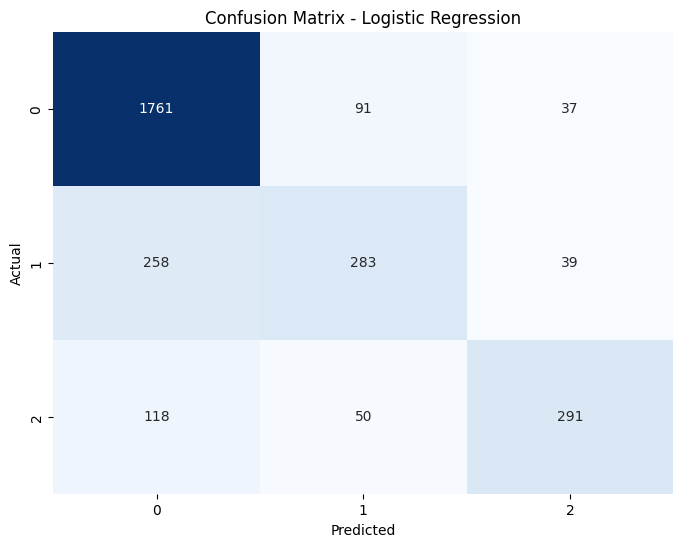

In [86]:
# EDA 1: Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

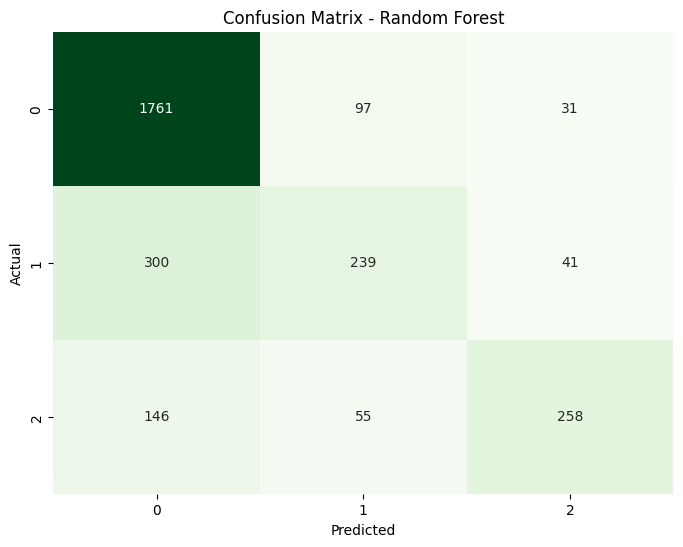

In [87]:
# EDA 2: Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

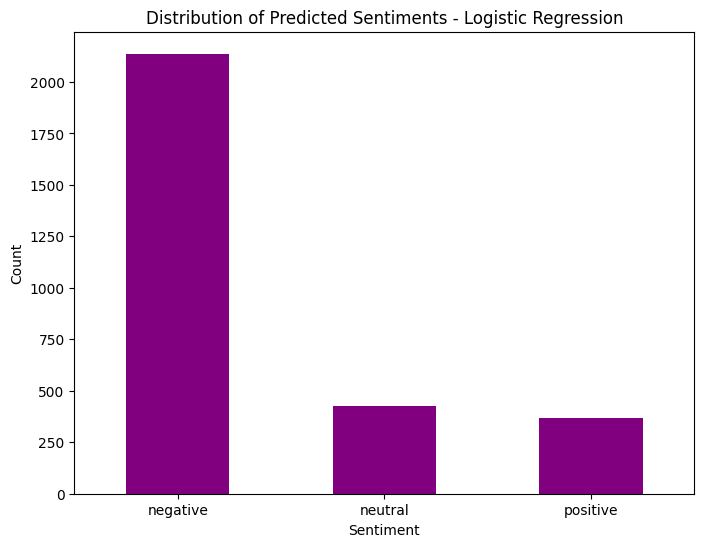

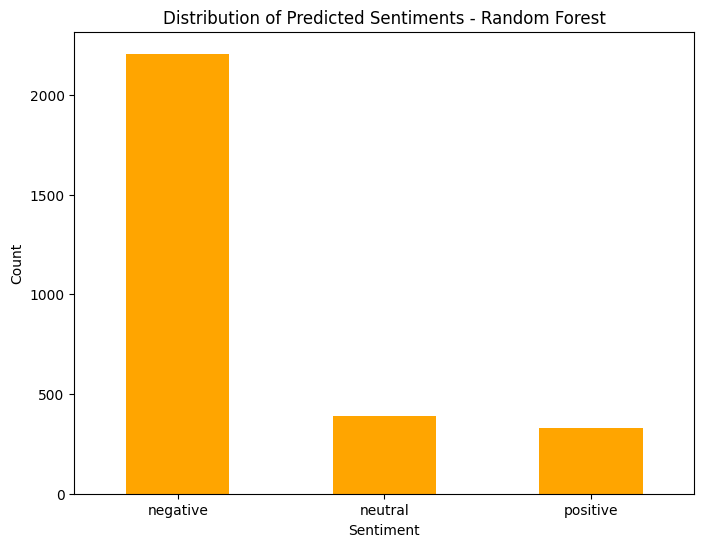

In [88]:
# Bar Plot Histogram for Predicted Sentiments - Logistic Regression
plt.figure(figsize=(8, 6))
pd.Series(y_pred_lr).value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Predicted Sentiments - Logistic Regression')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar Plot Histogram for Predicted Sentiments - Random Forest
plt.figure(figsize=(8, 6))
pd.Series(y_pred_rf).value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribution of Predicted Sentiments - Random Forest')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()